# Partial immunity model for strains 'in circle'
This is the Python version of program 4.2 from page 123 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as fmp

In [2]:
#Parameters (rates here are specified in terms of days)

N=4; #number or strains
beta=40.0; #transmission rate
gamma=9.98; #recovery rate
mu=0.02; #natural death rate
a=0.4; #modified transmission rate due to partial immunity.

#intial conditions
S0=np.array([0.08, 0.1, 0.1, 0.11]); #initial proportion of the population that are susceptible to strain i.
P0=np.array([0.4, 0.3, 0.3, 0.29]); #initial proportion of the population that are partially immune to strain i.
lambda0=np.array([0.15, 0.02, 0.1, 0.01]); #initial force of infection due to strain i.

ND=MaxTime=200; #number of days
TS=1.0 #time step

#####################################################################################
### To be compatible with other versions of programs the 
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### You may also wish to try:
#(N,beta,gamma,mu,a,S0,P0,lambda0,ND)=(4,40,9.98,0.02,0.25,([0.25, 0.14, 0.25, 0.14]),\
#([0.016, 0.55, 0.016, 0.55]),([0.07, 1e-12, 0.07, 1e-12]),200)
INPUT=np.hstack((S0,P0,lambda0))

In [3]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3*N))
	V = INP   
	for i in range(N):
		r=np.mod(i+1,N)
		l=np.mod(i+N-1,N)
		Y[i] = mu - V[i]*(V[(2*N)+i]+V[(2*N)+l]+V[(2*N)+r]) - mu*V[i]
		Y[N+i] =  V[i] * (V[(2*N)+l] + V[(2*N)+r]) - V[N+i] * V[(2*N)+i] - mu*V[N+i]
		Y[(2*N)+i] = beta * (V[i] + a * V[N+i]) * V[(2*N)+i] - gamma*V[(2*N)+i] - mu*V[(2*N)+i]	
	return Y   # For odeint

In [4]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

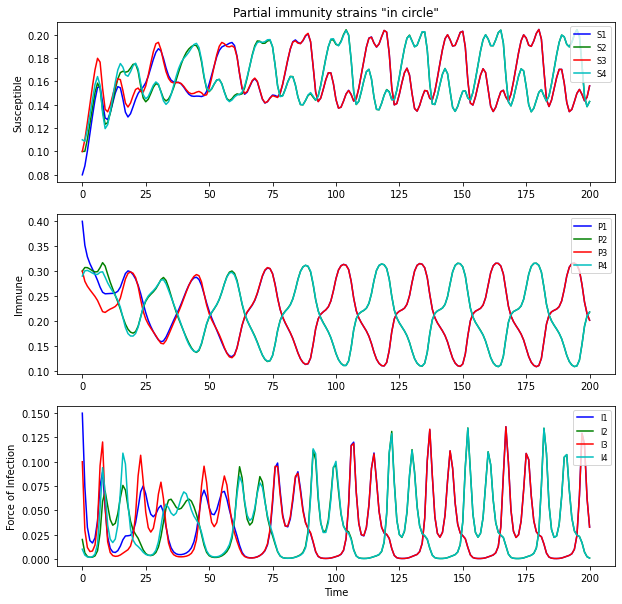

In [8]:
#Ploting
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Partial immunity strains "in circle"')
fig.add_subplot(311)
plt.plot(RES[:,0], 'b-', label='S1')
plt.plot(RES[:,1], 'g-', label='S2')
plt.plot(RES[:,2], 'r-', label='S3')
plt.plot(RES[:,3], 'c-', label='S4')
#plt.xlabel ('Time')
plt.ylabel ('Susceptible')
plt.legend(loc=1, prop=fmp(size='smaller'))
fig.add_subplot(312)
plt.plot(RES[:,N+0], 'b-', label='P1')
plt.plot(RES[:,N+1], 'g-', label='P2')
plt.plot(RES[:,N+2], 'r-', label='P3')
plt.plot(RES[:,N+3], 'c-', label='P4')
#plt.xlabel ('Time')
plt.ylabel('Immune')
plt.legend(loc=1, prop=fmp(size='smaller'))
fig.add_subplot(313)
plt.plot(RES[:,2*N+0], 'b-', label='l1')
plt.plot(RES[:,2*N+1], 'g-', label='l2')
plt.plot(RES[:,2*N+2], 'r-', label='l3')
plt.plot(RES[:,2*N+3], 'c-', label='l4')
plt.xlabel ('Time')
plt.ylabel ('Force of Infection')
plt.legend(loc=1, prop=fmp(size='smaller'))
plt.show()
fig.savefig('circular_partial_immunity.pdf')